# Python para periodismo
## Motivaciones.

> Dr. Ing. Juan B Cabral

## Fuentes de conocimiento

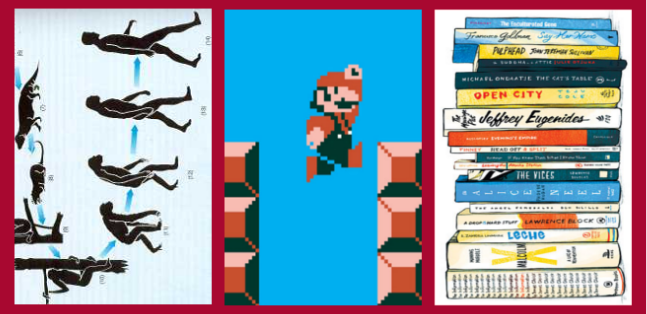

- Evolución
- Experiencia
- Cultura

## Fuentes de conocimiento

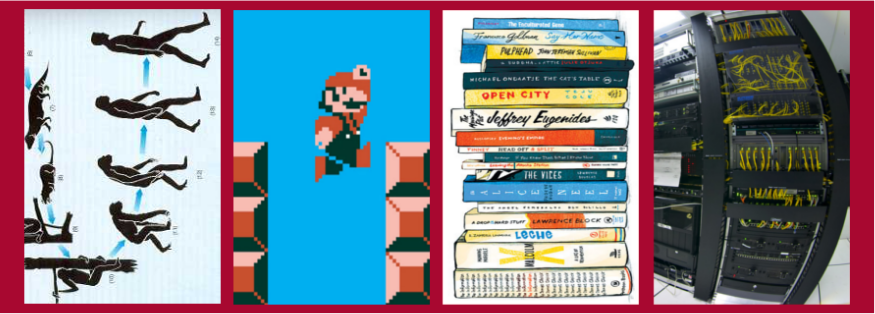

> Most of the knowledge in the world in the future is going to be extracted by machine and will reside inside machines.

*Yann LeCun, Director of AI Research, Facebook*


## El cuarto paradigma

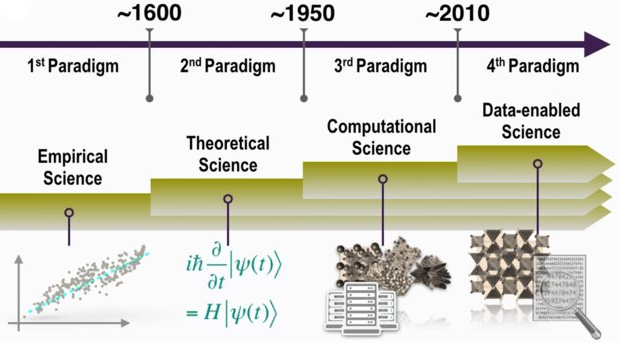

## Supongamos que queremos investigar a alguien

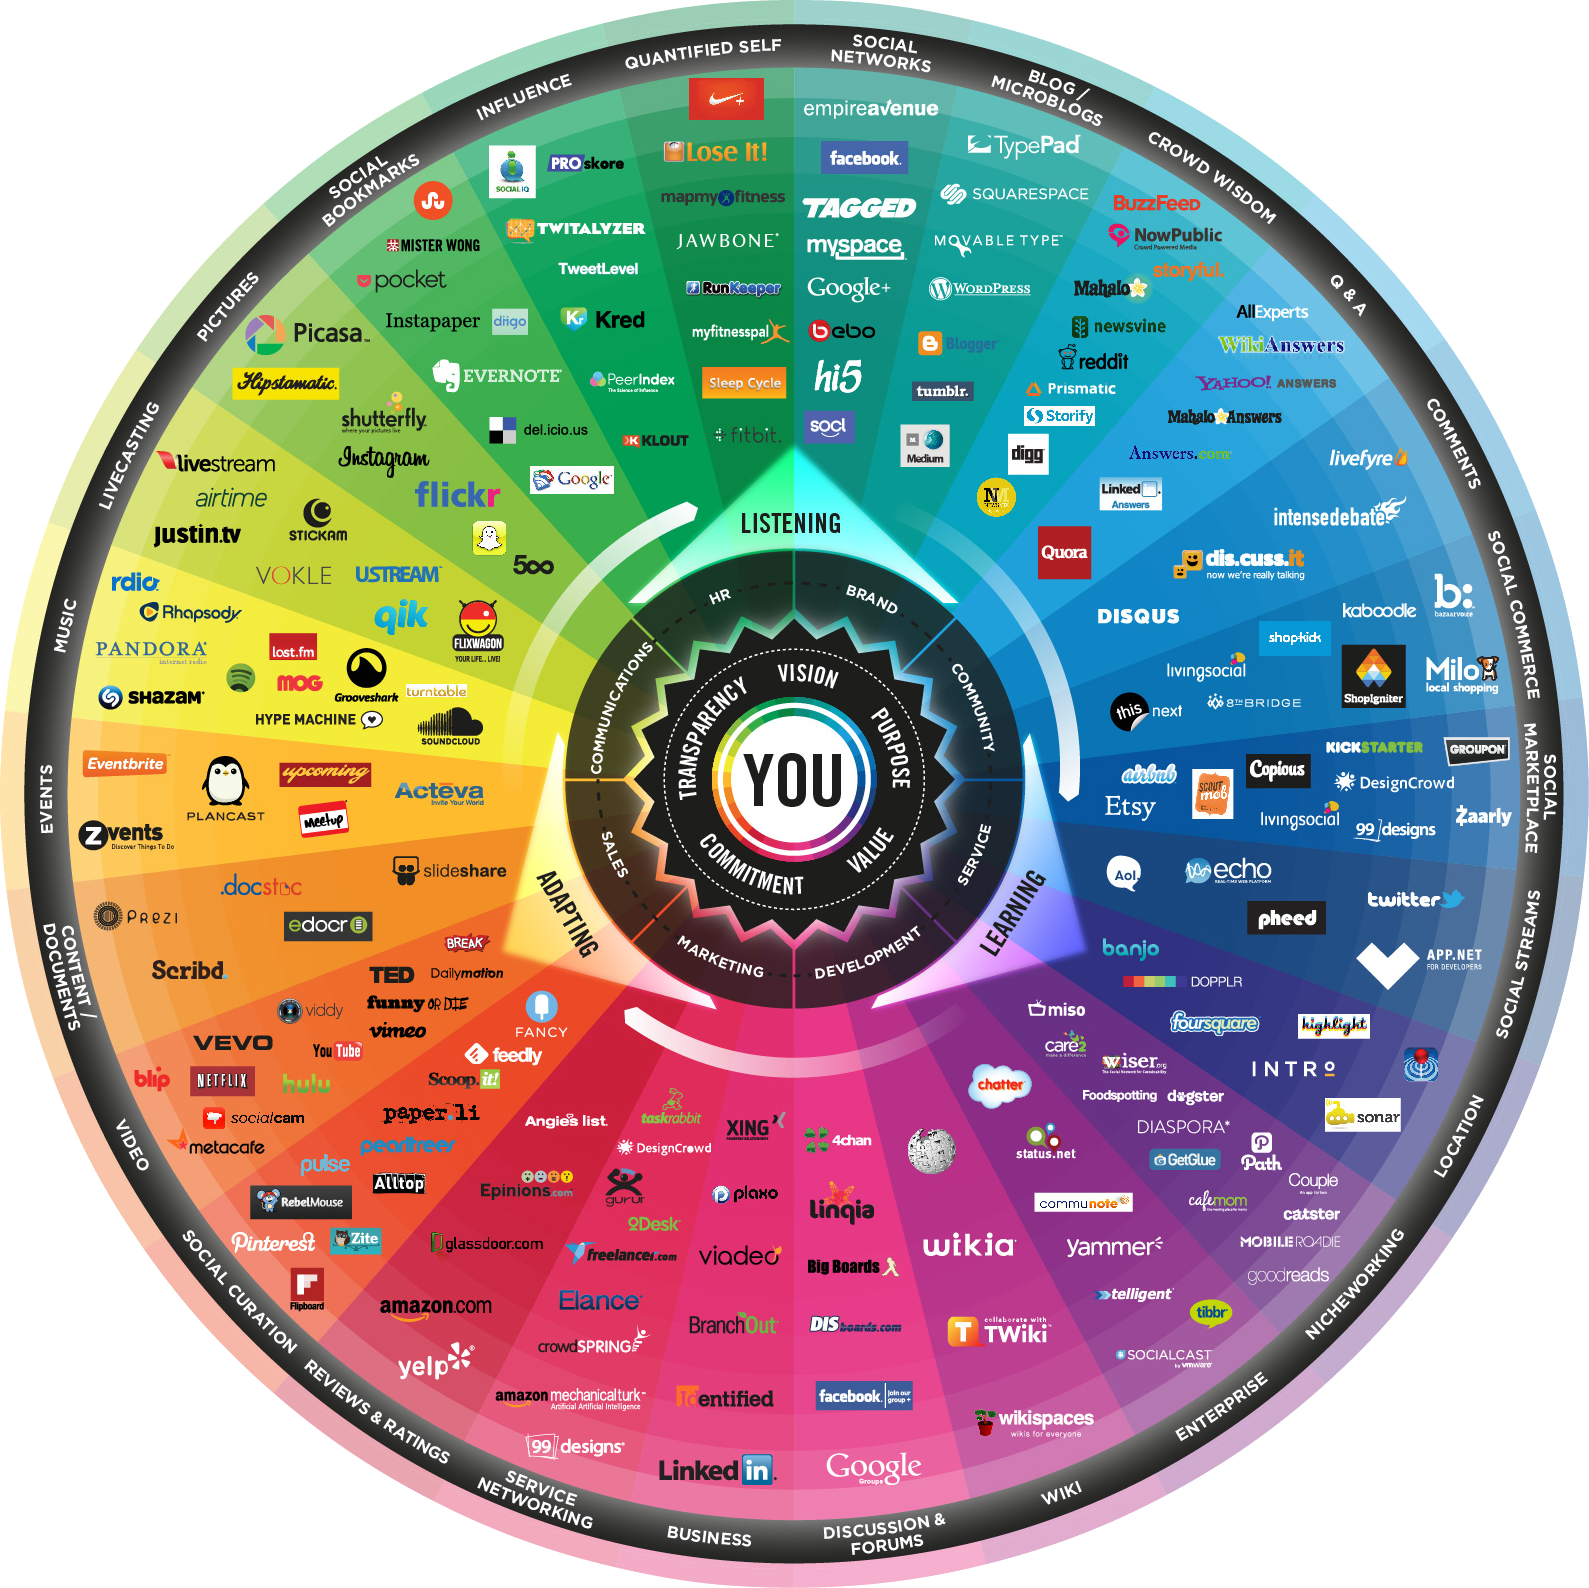

## El big data

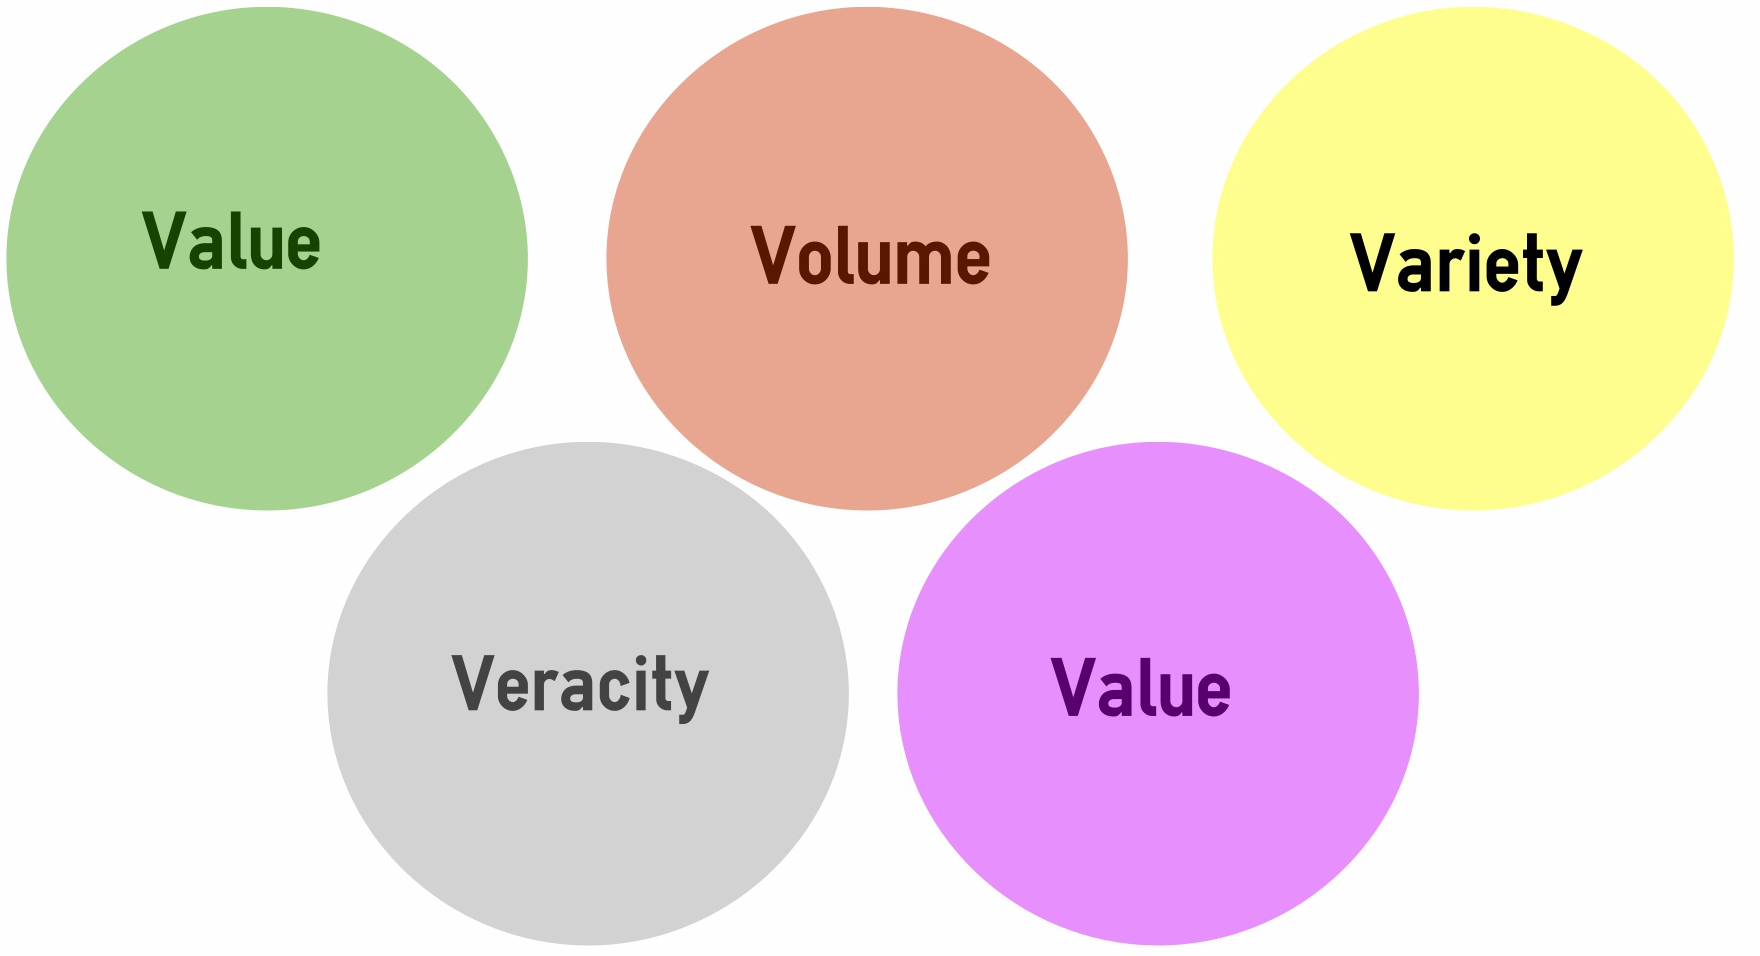

## Python al rescate

- Python es un lenguaje de programación muy popular en el contexto de los no programadores.
- Es un lenguaje de alto nivel y muy expresivo cuya sintaxis es limpia y sencilla.
- Python es un lenguaje ideal para todos aquellos que deseen iniciarse en el mundo de la programación y el análisis de datos. 

In [1]:
def fib(n):
    if n < 2:
        return n
    else:
        return fib(n-1) + fib(n-2)

In [2]:
fib(10)

55

## Python al rescate

- Incluye una gran cantidad de librerías con herramientas que resuelven aspectos muy variados dentro
de un proyecto periodístico. 
- Por ejemplo, el acceso a la información contenida en medios digitales, el procesamiento de grandes volúmenes de datos que son difíciles de procesar usando medios tradicionales, así como la generación
de gráficos que permitan a los usuarios visualizar los datos e interactuar con ellos.

## Algunas herramientas útiles de Python para periodismo.

- **Pandas:** Para acceder y manipular datos.
- **Requests:** Para acceder al código de cualquier pagina web.
- **pyquery:** Para manipular cualquier código de una pagina web.
- **Matplotlib:** Para graficar.

Además, existen infinidad de librerías específicas para acceder y manipular a fuentes de información específicas como: ``python-twitter`` (Twitter), `facebook-sdk` (Facebook), o ` google-api-python-client` para el ecosistema de servicios de Google.

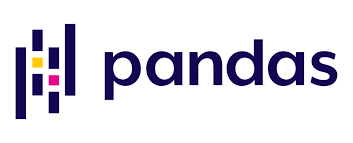

- Pandas pretende ser la herramienta fundamental de alto nivel para realizar análisis prácticos de datos del mundo real en Python. 
- También intenta ser

    - Accesible para todos
    - Libre para que los usuarios la usen y modifiquen
    - Flexible
    - Fácil de usar
    - Rápido

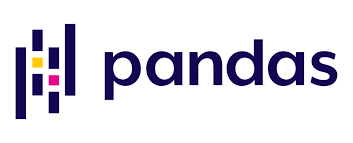

- Ofrece una estructura de datos llamada DataFrame que es como una hoja de calculo en memoria.
- Provee funciones de lectura y escritura de archivos tipo `csv`, `xls`, `ods`, `hdf5` (se usa en física), y bases de datos SQL.
- Permite analizar, reducir y pivotear cualquier dataset con relativa simpleza.

## Pandas

- Veamos de que se habla en este set de datos
- Es un archivo de notas de clarin

In [3]:
import pandas as pd  # Cargo pandas en mi lugar de trabajo

df = pd.read_csv("data/titulares.csv")
df.head()

url_articulo imagen  \
0  /politica/Reactivan-causa-juez-apunta-funciona...    NaN   
1  /mundo/Asesinaron-custodio-Maduro-concejal_0_1...    NaN   
2  /educacion/llevo-previas-paso-orden-Justicia_0...    NaN   
3  /ciudades/extra-subio-circulacion-camiones-aut...    NaN   
4  /deportes/futbol/river-plate/punta_0_113268684...    NaN   

                antetitulo fecha texto autor bajada  \
0  SOSPECHAS DE CORRUPCIÓN   NaN   NaN   NaN    NaN   
1     LA CRISIS VENEZOLANA   NaN   NaN   NaN    NaN   
2                EDUCACIÓN   NaN   NaN   NaN    NaN   
3                 TRÁNSITO   NaN   NaN   NaN    NaN   
4       RIVER 3 - RACING 2   NaN   NaN   NaN    NaN   

                                              titulo url_imagen  
0  Reactivan la causa y el juez apunta contra los...        NaN  
1  Asesinaron a un custodio de Maduro y a un conc...        NaN  
2  Se llevó tres previas, pero pasó de año por or...        NaN  
3  Sin el peaje extra, subió un 50% la circulació...        NaN  
4                                   De punta a punta        NaN

In [4]:
print("Datos totales:", len(df))

Datos totales: 348


### Rango de fechas de las notas

In [5]:
# removemos datos espurios
fechas = df.fecha[~(df.fecha.isnull() | (df.fecha == "fecha"))]
fechas = pd.to_datetime(fechas, format="%Y-%m-%d", errors="ignore")
len(fechas)

278

In [6]:
fechas.describe()

count                     278
unique                     35
top       2014-05-06 00:00:00
freq                       14
first     2014-03-30 00:00:00
last      2014-05-09 00:00:00
Name: fecha, dtype: object

## Ahora veamos de que se habla (mas o menos)

In [7]:
# removemos todos los NaN del antetítulo
df = df[~df.antetitulo.isnull()]

### Removemos los no alfanuméricos y acentos

In [8]:
df.antetitulo = df.antetitulo.str.normalize('NFKD').str.encode(
    'ascii', errors='ignore').str.decode('utf-8')
df.antetitulo = df.antetitulo.str.replace('[^a-zA-Záéíóúñ ]', '')
df.antetitulo = df.antetitulo.str.lower()

### Removemos los Stopwords

In [9]:
from stop_words import get_stop_words

sp_swords = get_stop_words("spanish") + ["vez"]
all_ante_token = " ".join(df.antetitulo.unique())
all_ante_token = [w for w in all_ante_token.split() if w not in sp_swords]

print("Cantidad de temas:", len(all_ante_token))

Cantidad de temas: 641


### Veamos los 10 temas más comunes

In [10]:
from collections import Counter

cnt = Counter(all_ante_token)
cnt.most_common(10)

[('river', 6),
 ('debate', 6),
 ('tragedia', 6),
 ('inseguridad', 6),
 ('violencia', 6),
 ('caso', 5),
 ('santa', 4),
 ('k', 4),
 ('anos', 4),
 ('nacional', 4)]

### Veamos que formas tienen los temas

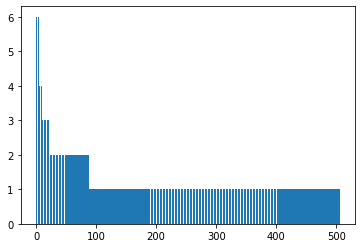

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

temas = dict(cnt.most_common())

plt.bar(range(len(temas)), list(temas.values()), align='center');

## Requests

Sirve para acceder a paginas web

In [12]:
import requests
response = requests.get("https://www.pagina12.com.ar/")

In [13]:
  response.text

'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:description" content="Nota

## Pyquery 

- Manipula datos de HTML
- Podemos ver de qué se está hablando en Página/12 hoy.

In [14]:
from pyquery import PyQuery

d = PyQuery(response.text)
titles = []
for e in d(".title, .title-prefix"):
    if e.text:
        print(e.text)
        titles.append(e.text)

A un mes del asesinato de Fernando Báez Sosa, el reclamo de su madre
Crimen de Villa Gesell: "Que se haga justicia por mi hijo y todas las víctimas de violencia"
En la foto aparece el sospechoso número 11
El paro cumplió 18 días en la empresa más importante de Brasil
Las fotos de la movilización al Congreso
El vaciamiento de Correo Argentino
El ex presidente analiza participar de la mesa nacional de su frente electoral
Nuevas pruebas contra los acusados
En zonas de origen de los niños wichí fallecidos
Podría anunciarse mañana
El fenómeno se podrá ver desde esta noche hasta el jueves 
Dijo que aceptará a su hijo "si sale así", pero aclaró que "es diferente" con las lesbianas
Además, por decreto, otorgó 1000 pesos en marzo a cuenta de futuras negociaciones 
Con la mira en el presupuesto 2020
Fue despedido por cosificarla
La organización estima que 12.000 niños podrían haber sido víctimas de sus exlíderes 
Alberto Fernández contra el lawfare
En Android ya se puede optar por el cambio de f

### Limpiemos los títulos y veamos que palabras aparecen

In [15]:
import string
import re
import unicodedata as ud

tokens = []
for tema in titles:
    tema = tema.lower()
    tema = re.sub('[^a-zA-Záéíóúñ ]', '', tema)
    
    for word in tema.split():
        if word not in sp_swords:
            tokens.append(word)

len(tokens)

596

### Las *n* palabras mas comunes

In [16]:
cnt = Counter(tokens)
cnt.most_common(15)

[('años', 6),
 ('ex', 4),
 ('niños', 4),
 ('nacimiento', 4),
 ('ray', 4),
 ('bradbury', 4),
 ('algún', 4),
 ('lugar', 4),
 ('feminismos', 4),
 ('san', 4),
 ('víctimas', 3),
 ('empresa', 3),
 ('presidente', 3),
 ('nacional', 3),
 ('origen', 3)]

### Distribucíon de las palabras mas comunes

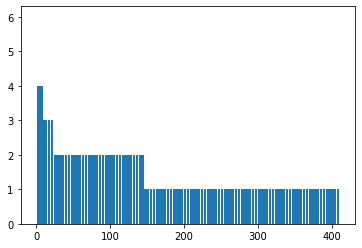

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

temas = dict(cnt.most_common())

plt.bar(range(len(temas)), list(temas.values()), align='center');

## Donde encontrar estas slides:

https://github.com/leliel12/cup_prog

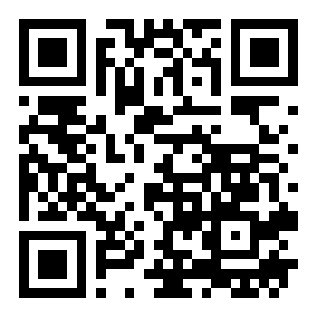

### Contacto

- jbc.develop@gmail.com

## Referencias

- Ruiz, Y. G., López, V., & Miñana, G. (2017). Programación y uso de Python en el desarrollo del periodismo de datos. TecCom Studies, (8), 25-33.
- Pilania, G., Liu, X. Y., & Wang, Z. (2019). Data-enabled structure–property mappings for lanthanide-activated inorganic scintillators. Journal of materials science, 54(11), 8361-8380.
- https://conversationprism.com/
- https://www.pagina12.com.ar/
- https://www.clarin.com/
- https://pandas.pydata.org/
- https://requests.readthedocs.io/en/master/
- https://pythonhosted.org/pyquery/api.html